In [1]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [3]:
df=pd.read_csv('Real-estate.csv')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
X=df[['X3 distance to the nearest MRT station']].values
y_true=df[['Y house price of unit area']].values

In [6]:
X

array([[  84.87882],
       [ 306.5947 ],
       [ 561.9845 ],
       [ 561.9845 ],
       [ 390.5684 ],
       [2175.03   ],
       [ 623.4731 ],
       [ 287.6025 ],
       [5512.038  ],
       [1783.18   ],
       [ 405.2134 ],
       [  90.45606],
       [ 492.2313 ],
       [2469.645  ],
       [1164.838  ],
       [ 579.2083 ],
       [ 292.9978 ],
       [ 350.8515 ],
       [ 368.1363 ],
       [  23.38284],
       [2275.877  ],
       [ 279.1726 ],
       [1360.139  ],
       [ 279.1726 ],
       [ 480.6977 ],
       [1487.868  ],
       [ 383.8624 ],
       [ 276.449  ],
       [ 557.478  ],
       [ 451.2438 ],
       [4519.69   ],
       [ 769.4034 ],
       [ 488.5727 ],
       [ 323.655  ],
       [ 205.367  ],
       [4079.418  ],
       [1935.009  ],
       [1360.139  ],
       [ 577.9615 ],
       [ 289.3248 ],
       [4082.015  ],
       [4066.587  ],
       [ 519.4617 ],
       [ 512.7871 ],
       [ 533.4762 ],
       [ 488.8193 ],
       [ 463.9623 ],
       [ 640.

In [7]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [10]:
model.fit(X,y_true, epochs=40)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
414/414 [==============================] - 0s 296us/step - loss: 273631.1092
Epoch 2/40
414/414 [==============================] - 0s 37us/step - loss: 57074.0498
Epoch 3/40
414/414 [==============================] - 0s 32us/step - loss: 6546.9279
Epoch 4/40
414/414 [==============================] - 0s 41us/step - loss: 2709.4911
Epoch 5/40
414/414 [==============================] - 0s 36us/step - loss: 1571.9080
Epoch 6/40
414/414 [==============================] - 0s 39us/step - loss: 1276.3427
Epoch 7/40
414/414 [==============================] - 0s 41us/step - loss: 1002.9432
Epoch 8/40
414/414 [==============================] - 0s 42us/step - loss: 904.4891
Epoch 9/40
414/414 [==============================] - 0s 39us/step - loss: 837.5005
Epoch 10/40
414/414 [==============================] - 0s 37us/step - loss: 747.7738
Epoch 11/40
414/414 [==============================] - 0s 47us/step - loss: 698.9162
Epoch 12/40
414

In [11]:
y_pred=model.predict(X)

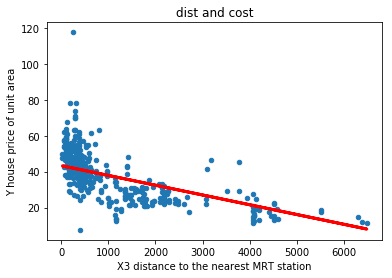

In [12]:
df.plot(kind='scatter',
       x='X3 distance to the nearest MRT station',
       y='Y house price of unit area', title='dist and cost')
plt.plot(X, y_pred, color='red', linewidth=3)

In [13]:
w,b=model.get_weights()

In [14]:
w

array([[-0.00543122]], dtype=float32)

In [15]:
b

array([43.313717], dtype=float32)